In [9]:
import sklearn 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv(r"C:\Users\DELL\Desktop\DATA SETS\Dry_Bean_Dataset.csv")
df.head()


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
df.shape

(13611, 17)

In [5]:
fv=df.iloc[:,0:16]
cv=df.iloc[:,-1]

In [6]:
fv

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


In [7]:
cv

0           SEKER
1           SEKER
2           SEKER
3           SEKER
4           SEKER
           ...   
13606    DERMASON
13607    DERMASON
13608    DERMASON
13609    DERMASON
13610    DERMASON
Name: Class, Length: 13611, dtype: object

In [10]:
x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,stratify=cv,random_state=12)

In [11]:
std=StandardScaler()
px_train=std.fit_transform(x_train)
px_test=std.transform(x_test)

In [12]:
n=[]
acc_1=[]
err_1=[]
for k in range(1,150,2):
    knn=KNeighborsClassifier(n_neighbors=k)
    model=knn.fit(px_train,y_train)
    predited=model.predict(px_test)
    accuracy_score(y_test,predited)
    n.append(k)
    acc_1.append(accuracy_score(y_test,predited))
    err_1.append(1-accuracy_score(y_test,predited))

In [14]:
acc_1

[0.9063532868160118,
 0.9221446933529196,
 0.9258171134777818,
 0.927653323540213,
 0.9265515975027543,
 0.9280205655526992,
 0.9287550495776716,
 0.9298567756151304,
 0.9283878075651855,
 0.9287550495776716,
 0.9302240176276166,
 0.9313257436650753,
 0.9291222915901579,
 0.9294895336026442,
 0.9283878075651855,
 0.927653323540213,
 0.9261843554902681,
 0.9269188395152406,
 0.9261843554902681,
 0.927653323540213,
 0.9283878075651855,
 0.927653323540213,
 0.9269188395152406,
 0.9261843554902681,
 0.9261843554902681,
 0.9269188395152406,
 0.9272860815277267,
 0.9258171134777818,
 0.9272860815277267,
 0.9261843554902681,
 0.9261843554902681,
 0.9261843554902681,
 0.9254498714652957,
 0.9258171134777818,
 0.9254498714652957,
 0.9265515975027543,
 0.9265515975027543,
 0.9269188395152406,
 0.9258171134777818,
 0.9265515975027543,
 0.9265515975027543,
 0.9258171134777818,
 0.9261843554902681,
 0.9265515975027543,
 0.9261843554902681,
 0.9261843554902681,
 0.9250826294528094,
 0.92581711347778

In [15]:
err_1

[0.0936467131839882,
 0.0778553066470804,
 0.07418288652221816,
 0.07234667645978698,
 0.07344840249724571,
 0.07197943444730082,
 0.07124495042232837,
 0.07014322438486964,
 0.07161219243481454,
 0.07124495042232837,
 0.06977598237238336,
 0.06867425633492474,
 0.07087770840984209,
 0.07051046639735581,
 0.07161219243481454,
 0.07234667645978698,
 0.07381564450973188,
 0.07308116048475943,
 0.07381564450973188,
 0.07234667645978698,
 0.07161219243481454,
 0.07234667645978698,
 0.07308116048475943,
 0.07381564450973188,
 0.07381564450973188,
 0.07308116048475943,
 0.07271391847227326,
 0.07418288652221816,
 0.07271391847227326,
 0.07381564450973188,
 0.07381564450973188,
 0.07381564450973188,
 0.07455012853470433,
 0.07418288652221816,
 0.07455012853470433,
 0.07344840249724571,
 0.07344840249724571,
 0.07308116048475943,
 0.07418288652221816,
 0.07344840249724571,
 0.07344840249724571,
 0.07418288652221816,
 0.07381564450973188,
 0.07344840249724571,
 0.07381564450973188,
 0.073815644

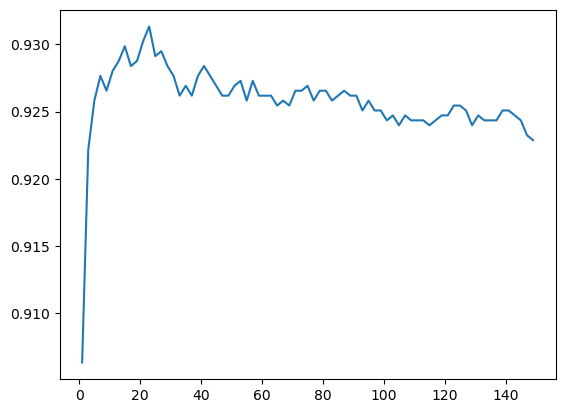

In [24]:
plt.plot(n,acc_1)

In [21]:
knn=KNeighborsClassifier(n_neighbors=19)
model=knn.fit(px_train,y_train)
predited=model.predict(px_test)
accuracy_score(y_test,predited)

0.9287550495776716

In [23]:
accuracy_score(y_test,predited)

0.9287550495776716

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

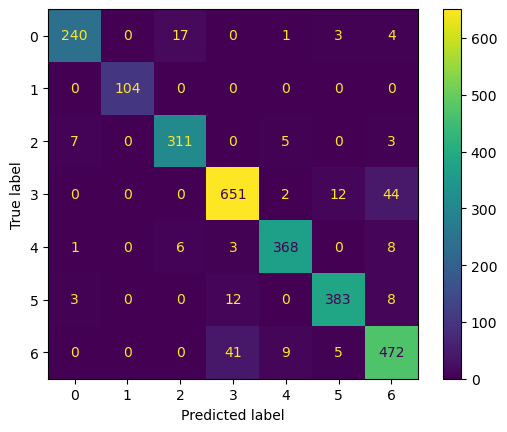

In [29]:
cm=ConfusionMatrixDisplay(confusion_matrix(y_test,predited,labels=model.classes_))
cm.plot()
plt.show()

In [25]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(y_test,predited))

              precision    recall  f1-score   support

    BARBUNYA       0.96      0.91      0.93       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.93      0.95      0.94       326
    DERMASON       0.92      0.92      0.92       709
       HOROZ       0.96      0.95      0.95       386
       SEKER       0.95      0.94      0.95       406
        SIRA       0.88      0.90      0.89       527

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723

